# Schritt 1: Aufbereitung der Daten

In diesem Notebook werden die csv-Dateien, die aus Zoho exportiert und heruntergeladen wurden, eingelesen sowie die bereits aus Schritt 0 vorhandenen Dateien mit den Spaltenüberschriften. 
Dann wird ein Key erstellt, der die Codes der Personen wo möglich (Pre- und Posttest liegen vor) "P-Nummern" zuordnet, und die Dateien werden als anonyme Excel-Dateien gespeichert.

Letztlich werden Dateien erstellt, die fertig aufbereitet sind, sodass sie in MaxQDA eingelesen oder in weiteren Notebooks mit python bearbeitet werden können, um die Forschungsfragen zu bearbeiten. 

In [5]:
# Einlesen der Bibliotheken:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from JanPromoBib_Auswertung_v2 import * # hierin sind die selbstgeschriebenen Funktionen

# Ordner und Dateinamen

In [23]:
# Ordner:
Ordner_Rohdaten = "2023-02-07_DatenZohoFinal"
Ordnername_keys_header = "keys_header"
Ordner_Zwischendaten = "2023-02-07_DatenArbeit"

try:
    os.mkdir(Ordner_Zwischendaten)
except: 
    print("Ordner existiert bereits.")
    
    
# Die Dateinamen: 
#dateinamen_pre_post = ["2023-02-07_PreUmfrageECMB_Report.csv", "2023-02-07_PostUmfrageECMB_Report.csv"]
kuerzel_pre_post = ["pre", "post"]

#dateinamen_blitzumfragen = ["2023-02-07_BU1_Beginn_Report.csv", "2023-02-07_BU2_Modelle_Report.csv", "2023-02-07_BU3Te_Simulation_Textgruppe_Report.csv", "2023-02-07_BU3Vi_Simulation_Videogruppe_Report.csv", "2023-02-07_BU4eigeneSimulation_Report.csv", "2023-02-07_BU5Artikel_Report.csv", "2023-02-07_BU6PeerReview_Report.csv"]
kuerzel_blitzumfragen = ["BU1", "BU2","BU3Te","BU3Vi","BU4","BU5","BU6"]

#dateinamen_abschnittsumfragen = ["2023-02-07_L1LehrkrfterckmeldungzumBeginn_Report.csv", "2023-02-07_L2Modelle_Report.csv", "2023-02-07_L3KonzeptSimulation_Report.csv", "Platzhalter_damit_Nummern_gleich_bei_BU_und_AU", "2023-02-07_L4eigeneSimulation_Report.csv", "2023-02-07_L5Artikel_Report.csv", "2023-02-07_L6PeerReview_Report.csv"]
kuerzel_abschnittsumfragen = ["AU1", "AU2","AU3","leer","AU4","AU5","AU6"]

Ordner existiert bereits.


# Spaltenüberschriften anpassen

In [25]:
# Zunächst werden die csv-Dateien aus Zoho eingelesen sowie die manuell erstellten Dateien für die header (=Spaltenüberschriften).
# Damit werden dann mit der Funktion "replace header" xlsx-Dateien erstellt, deren oberste Zeile sinnvolle Spaltenüberschriften enthält. 

# Pre- und Posttest umschreiben:
for i in range(2):
    xlsx_with_header = kuerzel_pre_post[i] + "_header.xlsx"
    csv_with_data    = kuerzel_pre_post[i] + ".csv"
    name_for_result  = kuerzel_pre_post[i] + "_mitColumns"

    replace_header(xlsx_with_header, csv_with_data, name_for_result, Ordner_Rohdaten, Ordner_Zwischendaten)
    
# Blitzumfragen umschreiben:
for i in range(7):
    xlsx_with_header = kuerzel_blitzumfragen[i] + "_header.xlsx"
    csv_with_data    = kuerzel_blitzumfragen[i] + ".csv"
    name_for_result  = kuerzel_blitzumfragen[i] + "_mitColumns"

    replace_header(xlsx_with_header, csv_with_data, name_for_result, Ordner_Rohdaten, Ordner_Zwischendaten)
    print(i)

done.
done.
done.
0
done.
1
done.
2
done.
3
done.
4
done.
5
done.
6


# Zeilen bearbeiten: Codes zu Nr zuordnen

- dataframes pre und post einlesen

Blacklist und Erweiterung der Dataframes pre und post:
- eine blacklist anlegen mit Codes, die gelöscht werden ("test", Zwillinge, etc.) --> vorläufig erledigt. Später ergänzen.
- eine Funktion schreiben, die Zeilen der Blacklist aus einem Dataframe löscht und diese auf pre und post anwenden --> erledigt
- je Spalte "P" für P-Nr (Person in Pre- UND Post-Test) und "X" für X-Nr (ein Test fehlt) und "K" für Kurs und "T" für Text und "V" für Video hinzufügen, alle gefüllt mit zeros.

Schlüssel vorbereiten: 
- lege Dataframe P-key an mit den Spalten "Code" und "P-Nr" und "Kurs" und 9 Spalten für Pre- und Posttest und vorhanden oder nicht
- lege Dataframe x-key an mit den Spalten "Code" und "X-Nr" und "Kurs" und 9 Spalten für Pre- und Posttest und vorhanden oder nicht

Pretest durchgehen und P-key erzeugen:
- in pretest: alle Zeilen aus Pretest durchgehen: Code auch in Post? Wenn ja: vergib eine P-Nr aufsteigend. Schreibe diese in die P-Spalte (entsprechenden Wert zuordnen) und in das Dataframe P-key (zeile anhängen --> append). Ordne auch den Kurs zu. Wenn nein: vergib eine X-Nr aufsteigend. Schreibe diese in die P-Spalte (entsprechenden Wert zuordnen) und in das Dataframe P-key (zeile anhängen --> append). Ordne auch den Kurs zu.
- manuell durchsehen, ob ich weitere Codes manuell zuordnen kann oder auf die Blacklist schrieben sollte. 
- auch die BU durchgehen und die key-Listen ergänzen.

Ergebnis: Listen mit P- und X-keys.

Nach alledem: 
- gehe Pre- und Posttest durch und mache je ein Dataframe, das nur die P-Nummern enthält (=Zeilennummern). Codes sind gelöscht. 
- in Blitzumfragen ersetze Codes durch P bzw. X Nr. Lege auch ein Dataframe an, in dem alle Personen sind, von denen die Daten komplett vorliegen. 
- die Textbasierten Pre-Post-Inter-Daten exportieren. Wie bekommt man sie am besten in MaxQDA?

In [26]:
# Daten von Pre- und Posttest einlesen:
df_pre  = pd.read_excel(Ordner_Zwischendaten + "/" + "pre_mitColumns.xlsx")
df_post = pd.read_excel(Ordner_Zwischendaten + "/" + "post_mitColumns.xlsx")

# Codes klein schreiben: 
df_pre = codes_small(df_pre)
df_post = codes_small(df_post)

## Entferne ungültige Codes der Blacklist aus den Dataframes:
blacklist = ["test", "ch1905 true", "ch1905 beispiel jan", "NaN"]

df_pre = remove_blacklist_from_df(df_pre, blacklist)
df_post = remove_blacklist_from_df(df_post, blacklist)

# Entferne außerdem doppelte Codes (Zwillinge):
df_pre = df_pre.drop_duplicates(subset = "Code", keep=False, ignore_index=True)
df_post = df_post.drop_duplicates(subset = "Code", keep=False, ignore_index=True)

In [27]:
# dataframes für die Zuordnung erstellen:  
df_P_key, df_X_key = create_P_and_X_key_df(df_pre, df_post)

# dataframe erstellen, in dem die Codes aus dem Posttest sind, die nicht zugeordent werden konnten: 
df_post_uebrige_codes, nr_remaining_codes = create_df_with_remaining_codes_from_posttest(df_pre, df_post)

C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

Int64Index([  2,   3,   4,   6,   7,  11,  12,  13,  14,  17,
            ...
            154, 155, 156, 157, 158, 159, 160, 162, 163, 164],
           dtype='int64', length=135)


C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

In [28]:
# nun zur Kontrolle: gib die Anzahl an Zeilen (=Einträge von Personen) an, die jeweils in den Umfragen sind. 
# Es sollte gelten: 
# Pre = P + X
# Post = nicht zugeordnet + P

len_pre   = df_pre.shape[0]
len_post  = df_post.shape[0]
len_P_key = df_P_key.shape[0]
len_X_key = df_X_key.shape[0]
len_rest  = df_post_uebrige_codes.shape[0]

print(len_pre)
print(len_P_key)
print(len_X_key)
print(len_P_key + len_X_key)

print("***")
print(len_post)
print(len_P_key)
print(len_rest)
print(len_rest + len_P_key)

# --> bei Post sind zwei Einträge unklar

196
135
61
196
***
165
135
30
165


In [29]:
# Speichere die Dataframes als Exceltabellen: 
df_P_key.to_excel("P_key.xlsx", index=False)
df_X_key.to_excel("X_key_neu.xlsx", index=False)
df_post_uebrige_codes.to_excel("uebrige_aus_post.xlsx", index=False)

# nach der manuellen Ergänzung

Es werden nun die Tabellen "X_key" (übrig in pre) und "uebrige_aus_post" verglichen. Wenn es Ähnlichkeiten nach folgenden Kriterien gibt, werden die Codes miteinander assoziiert, auch wenn sie nicht exakt übereinstimmen: 
- die ersten beiden Buchstaben sind gleich
- die Zahlenpaare (von Mutter und Person selber) sind in der Reihenfolge vertauscht ODER ein Geburtstag stimmt überein und nur der andere nicht
- es gibt keinen anderen Code in einer der beiden Tabellen, der mindestens einem der assoziierenden ähnelt

mit diesen Ähnlichkeitsregeln können 9 weitere Pre-Post-Paare assoziiert werden

In [30]:
# lies die manuelle Ergänzung ein:
df_Codes_manuell = pd.read_excel("uebrige_aus_post_manuell2.xlsx")

In [31]:
df_Codes_manuell

,Unnamed: 0,Code,Code_pre
0,0,l8m22,NaN
1,1,da1904,NaN
2,5,st1313,NaN
3,8,ka0930,NaN
4,9,ch2507,NaN
5,10,si2911,NaN
6,15,an0724,NaN
7,16,ch2211,NaN
8,19,ne1011,ne0110
9,20,st0502,NaN


In [32]:
# erstelle nun eine Kopie vom Posttest, in dem die Codes hin zum Pretest korrigiert sind ("corr"):

df_post_corr = df_post

# korrigiere die falschen, aber manuell zugeordneten Codes im Posttest
for code_pre in df_Codes_manuell["Code_pre"].values:
    if pd.notna(code_pre) == True:
        
        print(code_pre)
        # suche den richtigen Eintrag (den aus dem Pretest) aus der manuellen Datei heraus:
        zeile_manuell = gib_zeile_von_eintrag_in_spalte(df_Codes_manuell, code_pre, "Code_pre")
        
        # suche den entsprechenden Eintrag aus dem Posttest heraus:
        code_post = df_Codes_manuell.at[zeile_manuell, "Code"]
        
        # ersetzte den Eintrag aus dem Posttest (falsch) durch den Eintrag aus dem Pretest:
        df_post_corr = df_post_corr.replace(to_replace=code_post, value=code_pre)         

ne0110
or2405
baum2020!
sa2509
ma1723
ra0718
rh1016
za1306


In [33]:
# Nun erstellen wir den P_key nochmal neu (corr) mit dem korrigierten Post-Test:

# dataframes für die Zuordnung erstellen:  
df_P_key_corr, df_X_key_corr = create_P_and_X_key_df(df_pre, df_post_corr)

# dataframe erstellen, in dem die Codes aus dem Posttest sind, die nicht zugeordent werden konnten: 
df_post_uebrige_codes_corr, nr_remaining_codes_corr = create_df_with_remaining_codes_from_posttest(df_pre, df_post_corr)

C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

Int64Index([  2,   3,   4,   6,   7,  11,  12,  13,  14,  17,
            ...
            154, 155, 156, 157, 158, 159, 160, 162, 163, 164],
           dtype='int64', length=143)


C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_P_key = df_P_key.append({"Code":c, "Nr": zaehler_P, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Evaluation\JanPromoBib_Auswertung_v2.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X_key = df_X_key.append({"Code":c, "Nr": zaehler_X, "Pre":1}, ignore_index=True)
C:\Users\Jan\Code\Promo\EduChallenge ModellBildung\Eval

In [34]:
# nun zur Kontrolle: gib die Anzahl an Zeilen (=Einträge von Personen) an, die jeweils in den Umfragen sind. 
# Es sollte gelten: 
# Pre = P + X
# Post = nicht zugeordnet + P

len_pre   = df_pre.shape[0]
len_post  = df_post_corr.shape[0]
len_P_key = df_P_key_corr.shape[0]
len_X_key = df_X_key_corr.shape[0]
len_rest  = df_post_uebrige_codes_corr.shape[0]

print(len_pre)
print(len_P_key)
print(len_X_key)
print(len_P_key + len_X_key)

print("***")
print(len_post)
print(len_P_key)
print(len_rest)
print(len_rest + len_P_key)


196
143
53
196
***
165
143
22
165


In [35]:
# Speichere die Dataframes als Exceltabellen: 
df_P_key_corr.to_excel("P_key_corr.xlsx", index=False)
df_X_key_corr.to_excel("X_key_corr.xlsx", index=False)
df_post_uebrige_codes_corr.to_excel("uebrige_aus_post_corr.xlsx", index=False)

df_pre.to_excel("pre_corr.xlsx", index=False)
df_post_corr.to_excel("post_corr.xlsx", index=False)

# Erstelle nun aus dem Schlüssel P_key_corr.xlsx die Pre- und Post-Tabelle und die BU für die weitere Auswertung:

In [36]:
# bisherigen Dataframes einlesen, die nun wichtig sind:
df_pre   = pd.read_excel("pre_corr.xlsx")
df_post  = pd.read_excel("post_corr.xlsx")
df_P_key = pd.read_excel("P_key_corr.xlsx")
df_X_key = pd.read_excel("X_key_corr.xlsx")

# die ersten beiden leeren Spalten entfernen und die ID in Pre- und Posttest:
df_pre = df_pre.iloc[:,1:]
df_post = df_post.iloc[:,1:]

# Spalten für Textgruppe (0=nein, 1=ja), Videogruppe (0=nein, 1=ja) und hinzufügen:
# hierbei ist KontrolleTeVi: 0=keine BU3 vorliegend, 1=genau eine Gruppe, 2=was falsch | Kontrolle = Video + Text

df_pre.insert(0, "P", 0)
df_pre.insert(1, "Te", 0)
df_pre.insert(2, "Vi", 0)
df_pre.insert(3, "KontrolleTeVi", 0)

df_post.insert(0, "P", 0)
df_post.insert(1, "Te", 0)
df_post.insert(2, "Vi", 0)
df_post.insert(3, "KontrolleTeVi", 0)

# P-Key ergänzen und BU aufbereiten

Trage im P-Key ein, welche Blitzumfragen (BU) ausgefüllt wurden.
Dabei außerdem die Blitzumfragen schon fertig stellen (anonymisiert).

In [37]:
# Nun zunächst den P_Key ausfüllen (bevor später alles anonymisiert wird)

# erstelle Ordner für die für MaxQDA fertigen Blitzumfragen:
Ordner_Daten_Aufbereitet = "DatenAufbereitetFinal"

try:
    os.mkdir(Ordner_Daten_Aufbereitet)
except: 
    print("Ordner existiert bereits.")


# lies die Blitzumfragen BU ein: 
kuerzel_blitzumfragen = ["BU1", "BU2","BU3Te","BU3Vi","BU4","BU5","BU6"] # oben definiert

zaehler_global = 0

for kuerzel in kuerzel_blitzumfragen:
    
    #print(kuerzel)
    
    zaehler_ID_BU_intern = 0
    df = pd.read_excel(Ordner_Zwischendaten + "/" + kuerzel + "_mitColumns.xlsx")
    #print(df)
    
    # lösche erste Zeile "Unnamed: 0" und füge Zeilen "P-Key" und "X-key" hinzu (je: 0 = kein key) und ID-BU-intern
    df = df.iloc[:,1:]
    df.insert(0, "P", 0)
    df.insert(1, "X", 0)
    df.insert(2, "ID-BU-intern", 0)
    #print(df)
    
    # für MaxQDA füge die Spalten Dokumentgruppe und Dokumentname hinzu:
    df.insert(0, "Dokumentgruppe", kuerzel)
    df.insert(1, "Dokumentname", "leer")
    
    # leere Felder auffüllen, damit sie in MaxQDA als leer erfasst werden können:
    df = df.fillna(value="XXX (leeres Feld)")   
    
    
    # gehe jede Zeile des df der BU durch und prüfe, ob der Code (ignoriere Groß-Kleinschreibung) im P-key ist.
    # wenn ja: trage den P-key in die Zeile ein und mache eine "1" in der entsprechenden Zeile im P-key-Dokument
    # wenn nein: ID-BU-intern in Zeile eintragen und um eins erhöhen
    
    len_df = df.shape[0]
    #print(len_df)
    for i in range(len_df): # geht alle Zeilen der BU durch. "i" ist die Zeilennummer in der BU.
        code = str(df.at[i, "Code"]).lower()
        #print(code)
        
        # Code der BU-Zeile ist in P_key vorhanden:
        if code in df_P_key["Code"].values:
            zaehler_global = zaehler_global + 1
            zeile_P_key = df_P_key.loc[df_P_key['Code'] == code].index[0] # die Zeilennummer im P_key
            local_P_Nr = df_P_key.at[zeile_P_key, "Nr"]
            
            # trage nun die P_Nr in das BU dataframe ein: 
            df.at[i, "P"] = local_P_Nr
            df.at[i, "Dokumentname"] = "P" + str(local_P_Nr)
            
            # mache eine 1 in der entsprechenden Spalte in der P_key Übersicht:
            df_P_key.at[zeile_P_key, kuerzel] = 1
            
           
            
        else:
            #print("nein " + kuerzel + "   " + str(i))
            
            if code in df_X_key["Code"].values:
                zeile_X_key = df_X_key.loc[df_X_key['Code'] == code].index[0] # die Zeilennummer im P_key
                local_X_Nr = df_X_key.at[zeile_X_key, "Nr"]
                # trage nun die P_Nr in das BU dataframe ein: 
                df.at[i, "X"] = local_X_Nr
                df.at[i, "Dokumentname"] = "X" + str(local_X_Nr)
                
            else:
                df.at[i, "ID-BU-intern"] = zaehler_ID_BU_intern
                
                df.at[i, "Dokumentname"] = "I" + str(zaehler_ID_BU_intern)
                zaehler_ID_BU_intern = zaehler_ID_BU_intern + 1
            
    # lösche nun die Code-Spalte (und eine übriggebliebene ID-Spalte gleich mit):
    df = df.drop(columns=['Code'])
    #df = df.drop(columns=['ID'])
    
    # das Dataframe sortieren:
    df = df.sort_values(by=['P'])
    
    # Speichere das df:
    df.to_excel(Ordner_Daten_Aufbereitet + "/" + kuerzel + "_anonym.xlsx", index=False)    
    
    
    # für BU3Te und BU3Vi zusätzlich separat am Ende:
    if kuerzel == "BU3Te" or kuerzel == "BU3Vi":
        print(kuerzel)
        # nach dem Speichern hier: lösche alle Zeilen, wo P-key == 0 ist. Speichere dann auch das kurze Dataframe mit Zusatz "NurP".
        alle_Zeilen_ohne_P_Nr = df.loc[df["P"] == 0].index
        print(alle_Zeilen_ohne_P_Nr)
        df = df.drop(alle_Zeilen_ohne_P_Nr)
        
        # weil es in diesem reduzierten Dataframe sowieso keine Einträge mit X oder ganz fehlender Nummer gibt, können auch die zugehörigen Spalten gelöscht werden:
        df = df.drop(columns=['X'])
        df = df.drop(columns=["ID-BU-intern"])
                
        anz_Zeilen_ohne_P_Nr = len(alle_Zeilen_ohne_P_Nr)
        print(anz_Zeilen_ohne_P_Nr)
        print("Zeilen in " + kuerzel + " mit P Nr: " + str(len_df - anz_Zeilen_ohne_P_Nr))
                
        df.to_excel(Ordner_Daten_Aufbereitet + "/" + kuerzel + "_anonym_nurP.xlsx", index=False)
                
        
print("***")
print(zaehler_global) # zählt 263 Übereinstimmungen ohne .lower() | bei Ignorierung der Groß-Klein-Schreibung mit .lower: 271 Übereinstimmungen

BU3Te
Int64Index([39, 68, 60, 48, 45, 38, 37, 30, 29, 27, 23, 20, 19, 18, 17, 16, 78,
            14, 13, 12,  2, 10, 15,  4,  5,  6,  8],
           dtype='int64')
27
Zeilen in BU3Te mit P Nr: 52
BU3Vi
Int64Index([ 0, 28, 29, 30, 64, 36, 39, 42, 48, 49, 54, 55, 56, 58, 61, 62, 20,
            18, 65,  2,  3,  4,  6, 13, 12],
           dtype='int64')
25
Zeilen in BU3Vi mit P Nr: 41
***
405


In [38]:
df_P_key

,Code,Nr,Pre,BU1,BU2,BU3Te,BU3Vi,BU4,BU5,BU6,Post
0,ke0808,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ga1528,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,va1317,2,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,ve1021,3,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ul0422,4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
138,ka0617,138,1,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
139,ha2524,139,1,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
140,cl1230,140,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
141,ni0810,141,1,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [39]:
# nun den P-key polieren (unnötiges raus und NaN --> 0) und speichern:
try:
    df_P_key = df_P_key.drop(columns=["Code_V2", "Code_V3", "Code_V4"])
except:
    print("Spalten schon weg.")
    
try:
    df_P_key = df_P_key.fillna(0)
except:
    print("Keine NaN vorhanden.")
    
# Spalten hinzufügen:
#df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)
df_P_key = df_P_key.assign(BU_gesamt = df_P_key["BU1"] + df_P_key["BU2"] + df_P_key["BU3Te"] + df_P_key["BU3Vi"] + df_P_key["BU4"] + df_P_key["BU5"] + df_P_key["BU6"])

# speichern: 
df_P_key.to_excel("P_KEY_Final.xlsx", index=False)

Spalten schon weg.


(array([13., 17., 37.,  0., 34., 17.,  0., 22.,  2.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

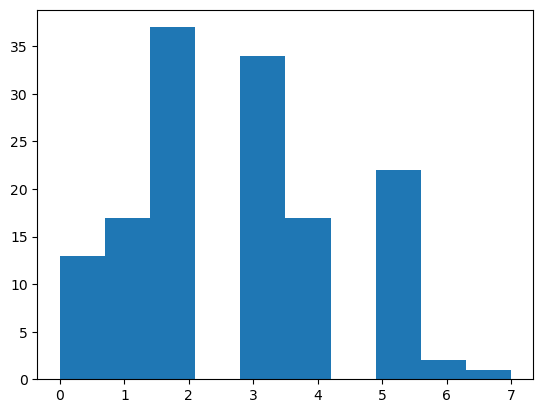

In [40]:
x = df_P_key["BU_gesamt"].values
plt.hist(x)

# Pre- und Posttest aufbereiten

- allgemein zur weiteren Arbeit damit
- für MaxQDA (ohne Likert-Items zu 4K und nur P-Nr)
- speziell für Intercoder-Reliabilität

In [41]:
def pre_post_aufbereiten(df, kuerzel, df_P_key, df_X_key, Ordner_Daten_Aufbereitet):
    """ 
    Eine Funktion, die die Dataframes von Pre- und Posttest aufbereitet und einmal anonym, aber vollständig und einmal reduziert (nur P-Nummern, ohne 4K) für MaxQDA ausgibt.    
    """
    
    # weitere Spalten einfügen (P gibt es schon, Dokumentgruppe und Dokumentname sind für MaxQDA wichtig)
    # für MaxQDA füge die Spalten  hinzu:
    df.insert(0, "Dokumentgruppe", kuerzel)
    df.insert(1, "Dokumentname", "leer")
    
    df.insert(3, "X", 0)
    df.insert(4, "ID-Test-intern", 0)
    
    # leere Felder auffüllen, damit sie in MaxQDA als leer erfasst werden können:
    df = df.fillna(value="XXX (leeres Feld)")  
    
    # Für die spätere Prüfung der Video-Text-Gruppe:
    df_BU3Vi = pd.read_excel(Ordner_Daten_Aufbereitet + "/BU3Vi_anonym.xlsx")
    df_BU3Te = pd.read_excel(Ordner_Daten_Aufbereitet + "/BU3Te_anonym.xlsx")
    
    # gehe nun alle Zeilen des df durch und trage P, X und I-Nr ein:
    
    zaehler_ID_Test_intern = 0
    len_df = df.shape[0]    
    for i in range(len_df): # geht alle Zeilen des df durch. "i" ist die Zeilennummer im Testdatensatz (pre/post)
        
        # Code im Testdatensatz
        code = str(df.at[i, "Code"]).lower()
        
        # wenn Code aus Testdatensatz in P_key vorhanden ist...
        if code in df_P_key["Code"].values:
            zeile_P_key = df_P_key.loc[df_P_key['Code'] == code].index[0] # die Zeilennummer im P_key
            local_P_Nr = df_P_key.at[zeile_P_key, "Nr"]
            
            #print(local_P_Nr)
            
            # trage nun die P_Nr in das Test dataframe ein und den Dokumentnamen: 
            df.at[i, "P"] = local_P_Nr
            df.at[i, "Dokumentname"] = "P" + str(local_P_Nr)
            
            # mache eine 1 in der entsprechenden Spalte in der P_key Übersicht:
            df_P_key.at[zeile_P_key, kuerzel] = 1    
            
            #Ergänze nun, ob die Person den BU3 ausgefüllt hat in der entsprechenden Zeile:
            if local_P_Nr in df_BU3Vi["P"].values:
                df.at[i, "Vi"] = 1
            else:
                nonsense = 42
                
            if local_P_Nr in df_BU3Te["P"].values:
                df.at[i, "Te"] = 1
            else:
                nonsense = 42
            
            
            
        # ansonsten...
        else:   
            if code in df_X_key["Code"].values:
                zeile_X_key = df_X_key.loc[df_X_key['Code'] == code].index[0] # die Zeilennummer im X_key
                local_X_Nr = df_X_key.at[zeile_X_key, "Nr"]
                # trage nun die X_Nr in das Test dataframe ein: 
                df.at[i, "X"] = local_X_Nr
                df.at[i, "Dokumentname"] = "X" + str(local_X_Nr)
                
                #Ergänze nun, ob die Person den BU3 ausgefüllt hat in der entsprechenden Zeile:
                if local_X_Nr in df_BU3Vi["X"].values:
                    df.at[i, "Vi"] = 1
                else:
                    nonsense = 42

                if local_X_Nr in df_BU3Te["X"].values:
                    df.at[i, "Te"] = 1
                else:
                    nonsense = 42
                
            else:               
                df.at[i, "ID-Test-intern"] = zaehler_ID_Test_intern
                
                df.at[i, "Dokumentname"] = "I" + str(zaehler_ID_Test_intern)
                zaehler_ID_Test_intern = zaehler_ID_Test_intern + 1
               
    # Kontrolliere, ob keine Person BU3 zweimal ausgefüllt hat: 
    df["KontrolleTeVi"] = df["Te"] + df["Vi"]
    print(df["KontrolleTeVi"].values)
    
    # lösche nun die Code-Spalte (und eine übriggebliebene ID-Spalte gleich mit):
    df = df.drop(columns=['Code'])
    df = df.drop(columns=['ID'])
    
    # das Dataframe sortieren:
    df = df.sort_values(by=['P'])
    
    # leere Felder auffüllen, damit sie in MaxQDA als leer erfasst werden können:
    df = df.fillna(value="XXX (leeres Feld)")  
    
    # Speichere das df:
    df.to_excel(Ordner_Daten_Aufbereitet + "/" + kuerzel + "_anonym.xlsx", index=False)    
    
    
    ### Erstelle nun eine weitere Datei, in der nur die Zeilen mit P-Nr. stehen und die 4K-Einträge entfernt wurden für die Auswertung in MaxQDA:
    
    # nach dem Speichern hier: lösche alle Zeilen, wo P-key == 0 ist. Speichere dann auch das kurze Dataframe mit Zusatz "NurP".
    alle_Zeilen_ohne_P_Nr = df.loc[df["P"] == 0].index
    df = df.drop(alle_Zeilen_ohne_P_Nr)
    
    # weil es in diesem reduzierten Dataframe sowieso keine Einträge mit X oder ganz fehlender Nummer gibt, können auch die zugehörigen Spalten gelöscht werden:
    df = df.drop(columns=['X'])
    df = df.drop(columns=["ID-Test-intern"])
    
    # lösche außerdem die 4K-Likert-Einträge löschen:
    VierK_Items = []
    for i in range(1,32):
        string = "f" + str(i)
        VierK_Items.append(string)
    try:
        df = df.drop(columns=VierK_Items)
    except:
        print(kuerzel + "keine 4K Einträge vorhanden")

    df.to_excel(Ordner_Daten_Aufbereitet + "/" + kuerzel + "_anonym_nurP_ohne4K.xlsx", index=False)
    
    print("Dataframe " + kuerzel + " wurde erfolgreich aufbereitet.")                

In [42]:
# df_pre, df_post sind noch von oben im Speicher. Sie wurden zwischen dem Einlesen verändert!

# pre
df = df_pre
kuerzel = "pre"
pre_post_aufbereiten(df, kuerzel, df_P_key, df_X_key, Ordner_Daten_Aufbereitet)

# post
df = df_post
kuerzel = "post"
pre_post_aufbereiten(df, kuerzel, df_P_key, df_X_key, Ordner_Daten_Aufbereitet)

[2 2 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 2 1 1 0 0 1 1 1 1 1 1 1 2 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 1 1 1 0]
Dataframe pre wurde erfolgreich aufbereitet.
[0 0 1 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1]
Dataframe post wurde erfolgreich aufbereitet.


# Erstelle Auswahl von 10% aus Pre und Post für die Intercoder-Reliabilität

In [43]:
Ordner_Daten_Aufbereitet = "DatenAufbereitetFinal"


df_pre  = pd.read_excel(Ordner_Daten_Aufbereitet + "/pre_anonym_nurP_ohne4K.xlsx")
df_pre  = df_pre.iloc[:, :26]
df_post = pd.read_excel(Ordner_Daten_Aufbereitet + "/post_anonym_nurP_ohne4K.xlsx")
df_post = df_post.iloc[:, :26]
len_df  = df_pre.shape[0]

# 1/Anteil:
frac = 5
len_df_new = int(len_df / frac)

columntitels = df_pre.columns
df_new = pd.DataFrame(columns = columntitels)

for i in range(len_df):
    if (i+1) % frac == 0:
        #print(i)
        df_new = df_new.append(df_pre.loc[i, :], ignore_index=True)
        df_new = df_new.append(df_post.loc[i, :], ignore_index=True)
        
df_new["Dokumentname"] = df_new["Dokumentname"] + df_new["Dokumentgruppe"]
        
kuerzel = "ICR"
df_new["Dokumentgruppe"] = kuerzel

df_new.to_excel(Ordner_Daten_Aufbereitet + "/" + kuerzel + ".xlsx", index=False)

C:\Users\Jan\AppData\Local\Temp\ipykernel_8764\3233780998.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_pre.loc[i, :], ignore_index=True)
C:\Users\Jan\AppData\Local\Temp\ipykernel_8764\3233780998.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(df_post.loc[i, :], ignore_index=True)


In [44]:
df_new

,Dokumentgruppe,Dokumentname,P,Te,Vi,KontrolleTeVi,M1,MS1,M2,MS2,...,S2,SS2,S3,SS3,PR1,PRS1,PR2,PRS2,PR3,PRS3
0,ICR,P5pre,5,1,0,1,Ein Modell um naturwissenschaftliche Erkenntni...,1,Ihre Erkenntnisse zu veranschaulichen und auch...,1,...,Kein Begriff,0,Kein Begriff,0,Kenne den Begriff nicht,0,Kein Begriff,0,Kein Begriff,0
1,ICR,P5post,5,1,0,1,"ein Modell, das einen Versuch bzw eine Vermutu...",3,um Vorgänge zu optimieren,3,...,"neue Erkenntnisse zu gewinnen, die Forschung v...",3,"verschiedene Kriterien, unter denen der Versuc...",3,eine wisssenschaftliche Arbeit zu überprüfen u...,5,abgeschlossener Artikel wird(anonym) einem Rev...,5,durch den anonymen Reviewer wird das Ziel erre...,4
2,ICR,P10pre,10,0,1,1,Die Vereinfachung eines Ausschnittes der Natur...,XXX (leeres Feld),XXX (leeres Feld),0,...,XXX (leeres Feld),0,XXX (leeres Feld),0,XXX (leeres Feld),0,XXX (leeres Feld),0,XXX (leeres Feld),0
3,ICR,P10post,10,0,1,1,Dient zum vergleich und zur Beschreibung von S...,XXX (leeres Feld),Um messwerte zu vergleichen,XXX (leeres Feld),...,"Zu forschen, astronomie",XXX (leeres Feld),XXX (leeres Feld),0,Gutachten um andere artikel zu überarbeiten un...,XXX (leeres Feld),XXX (leeres Feld),0,XXX (leeres Feld),0
4,ICR,P15pre,15,0,1,1,Versuchsreihe,1,Versuche auszuwerten,0,...,Weiß ich nicht,XXX (leeres Feld),Weiß ich nicht,XXX (leeres Feld),Weiß ich nicht,XXX (leeres Feld),Weiß ich nicht,XXX (leeres Feld),Weiß ich nicht,XXX (leeres Feld)
5,ICR,P15post,15,0,1,1,"Eine gedachte Theorie die man durch Versuche, ...",4,Naturphänomene zu verstehen und schließlich er...,4,...,Zusammenhänge in den Naturwissenschaften zu er...,4,1.Erstellung von einem Modell\n2.Zeit in Runde...,3,Um einen wissenschaftlichen Text zu überprüfen...,3,1.Ein wissenschaftlicher Text wird geschrieben...,4,Keine Adjektive \nBelege \nPrägnanz \nSo kurz ...,3
6,ICR,P20pre,20,0,0,0,Veranschaulichung einer Naturwissenschaftliche...,3,Dinge zu erklären und um Sachen genauer zu ver...,1,...,XXX (leeres Feld),0,XXX (leeres Feld),0,sich mehrere Meinungen einzuholen.,3,XXX (leeres Feld),0,XXX (leeres Feld),0
7,ICR,P20post,20,0,0,0,"Eine Vereinfachung von einer Beobachtungen, we...",4,Dinge (Z.B. Beobachtungen) vereinfacht darzust...,4,...,ein mathematisches Problem lösen zu können.,4,1. Modell mit Größen\n2. Zeit in Runden\n3…..,2,wissenschaftliche Artikel vor der Veröffentlic...,4,Als erstes schreibt man einen Artikel. Darauf ...,4,Durch die vielen Stationen können möglichst al...,3
8,ICR,P25pre,25,0,1,1,weiß ich nicht,XXX (leeres Feld),Ideen besser darzustellen,3,...,Weiß ich nicht,XXX (leeres Feld),Weiss ich nicht,XXX (leeres Feld),Etwas zu überprüfen,1,Weiß ich nicht,XXX (leeres Feld),Weiß ich nicht,XXX (leeres Feld)
9,ICR,P25post,25,0,1,1,Ein Modell was eine natürliche Bewegung verdeu...,4,Um Aufgaben/Experimente besser darzustellen,3,...,Modelle zu überprüfen,1,Kein ahnung,XXX (leeres Feld),Mehrere Verbesserungsvorschläge von anderen zu...,3,Man gibt anderen Leuten z.B den Artikel und di...,2,Keine Ahnung,XXX (leeres Feld)


In [24]:
142*0.15

21.3